# EDA Netflix

In [2]:
# импортируем библиотеки для визуализации данных и для их обработки/подготовки для визуализации
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
netflix = pd.read_csv('netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## Столбчатая диаграмма

In [50]:
import seaborn as sns

In [58]:
# подготавливаем данные
count_type = netflix[['show_id','type']].groupby('type').count()
count_type

,show_id
type,
Movie,4265
TV Show,1969


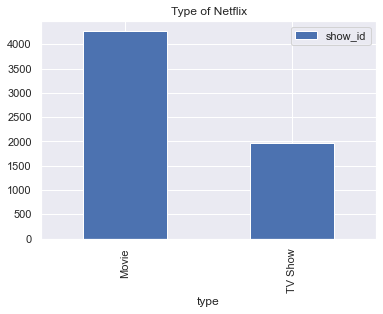

In [62]:
# строим столбчатую диаграмму, т.к. нам нужно все строчки из дф, то можем не использовать фильтры и метод loc
count_type.plot(kind='bar', 
                title='Type of Netflix')

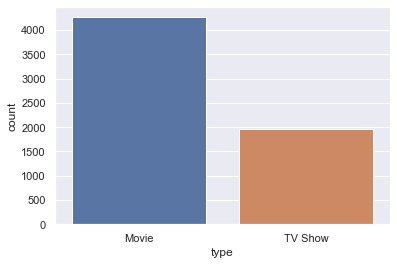

In [65]:
#построем столбчатую диаграмму по жанрам выпускаемых пр-ний c помощью библиолеки seaborn
sns.set()
sns.countplot(x="type",data=netflix) # countplot считает кол-во в разрезе типов, в пар-ме указываем разрез и дф
plt.show()

Исходя из столбчатой диаграммы можем сделать вывод, что Netflix больше выпускает фильмов, чем тв-шоу

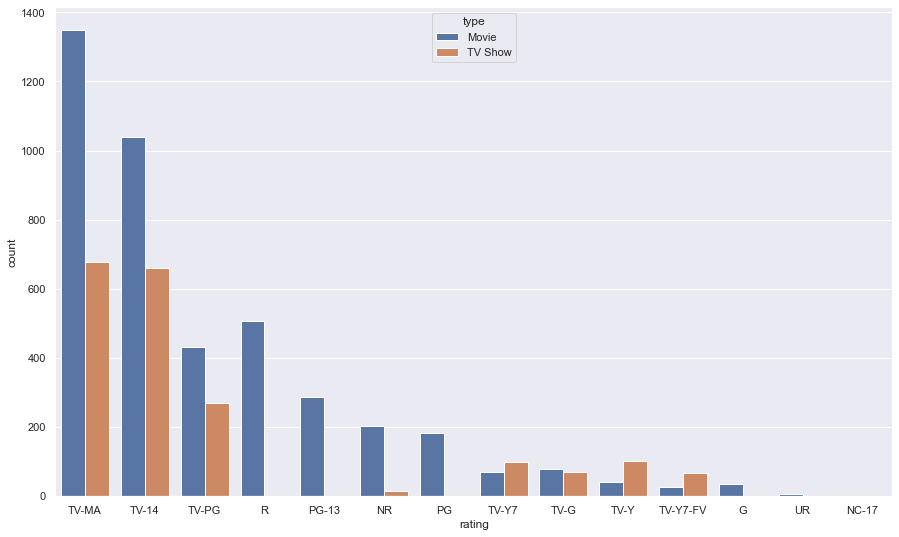

In [94]:
sns.set()
plt.figure(figsize=(15,9)) # задаем разрмер
sns.countplot(x="rating",data= netflix,hue= "type",order = netflix['rating'].value_counts().index[0:15])
 # в параметрах указываем иось х - рейтинг, дф, hue указ что выделять цветом (в разрезе чего будет подсчет), oreder - что считаем и указываем срез с попомощью индекс
plt.show()

смотря на диаграмму можем сделать вывод рейтинг TV-MA всегда дает наибольшее количество рейтингов для любого типа.

# Боксфлот

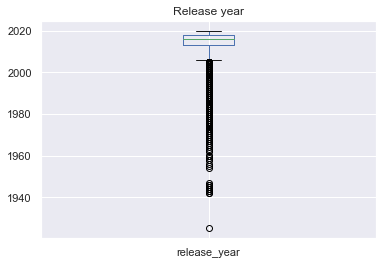

In [111]:
netflix['release_year'].plot(kind='box',
                    title='Release year')

Можем сделать вывод, что большая часть фильмов была выпущена в 2018-2019 гг. остальные данные можем воспринимать как выбросы

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


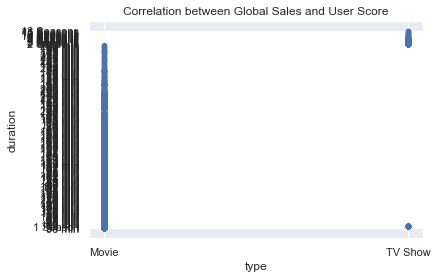

In [202]:
netflix.plot(kind='scatter', 
        x='type', 
        y='duration', 
        title='Correlation between Global Sales and User Score')
plt.show()

In [169]:
dynamics = netflix[['type'] + ['release_year']].groupby('release_year').count()
dynamics

,type
release_year,
1925,1
1942,2
1943,3
1944,3
1945,3
...,...
2016,830
2017,959
2018,1063


Text(0, 0.5, 'Кол-во релизов')

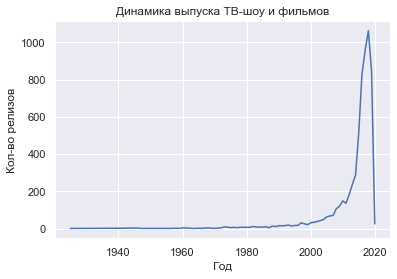

In [147]:
plt.plot(dynamics.index, dynamics.type)
plt.title('Динамика выпуска ТВ-шоу и фильмов')
plt.xlabel('Год')
plt.ylabel('Кол-во релизов')

Смотря на график можем увидеть как выпускались релизы в разрезе годов.
* в 2020 году идет выброс, т к данные собирались в 2019 году